In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('bmh')

In [2]:
#load the data
df= yf.Ticker('NFLX').history(start='2019-04-19',end='2020-04-06')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-04-18,355.000000,360.410004,351.640015,360.350006,8353200,0,0
2019-04-22,359.700012,377.690002,359.000000,377.339996,11980500,0,0
2019-04-23,375.450012,384.799988,374.709991,381.890015,10089800,0,0
2019-04-24,381.070007,381.899994,373.269989,374.230011,6541900,0,0
2019-04-25,374.489990,374.760010,365.700012,368.329987,6255500,0,0
...,...,...,...,...,...,...,...
2020-03-30,363.000000,377.799988,361.170013,370.959991,8622000,0,0
2020-03-31,367.929993,383.010010,366.440002,375.500000,9366500,0,0
2020-04-01,376.049988,380.230011,361.019989,364.079987,6672500,0,0


In [3]:
#Get the number of trading days
df.shape

(243, 7)

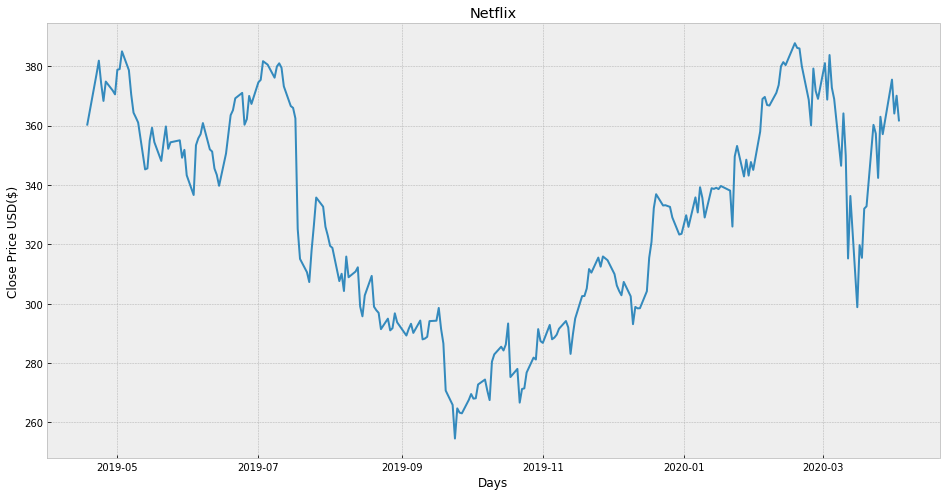

In [4]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [5]:
df=df[['Close']]

In [6]:
df

,Close
Date,
2019-04-18,360.350006
2019-04-22,377.339996
2019-04-23,381.890015
2019-04-24,374.230011
2019-04-25,368.329987
...,...
2020-03-30,370.959991
2020-03-31,375.500000
2020-04-01,364.079987


In [7]:
#create a variabel to predict x days into the future
future_days=25
#Create a new Column(target) shifted 'x units/days up'
df['Prediction']=df.shift(-future_days)
df

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2019-04-18,360.350006,354.390015
2019-04-22,377.339996,355.059998
2019-04-23,381.890015,349.190002
2019-04-24,374.230011,351.850006
2019-04-25,368.329987,343.279999
...,...,...
2020-03-30,370.959991,NaN
2020-03-31,375.500000,NaN
2020-04-01,364.079987,NaN


In [8]:
#create the feature data set (x) and convert it to a numpy array and remove the las 'x rows/days
X=np.array(df.drop('Prediction',axis=1))[:-future_days]
X

array([[360.3500061 ],
       [377.33999634],
       [381.89001465],
       [374.23001099],
       [368.32998657],
       [374.8500061 ],
       [371.82998657],
       [370.54000854],
       [378.80999756],
       [379.05999756],
       [385.02999878],
       [378.67001343],
       [370.45999146],
       [364.36999512],
       [362.75      ],
       [361.04000854],
       [345.26000977],
       [345.60998535],
       [354.98999023],
       [359.30999756],
       [354.45001221],
       [348.10998535],
       [354.26998901],
       [359.73001099],
       [352.20999146],
       [354.39001465],
       [355.05999756],
       [349.19000244],
       [351.8500061 ],
       [343.27999878],
       [336.63000488],
       [353.3999939 ],
       [355.73001099],
       [357.13000488],
       [360.86999512],
       [352.01000977],
       [351.26998901],
       [345.55999756],
       [343.42999268],
       [339.73001099],
       [350.61999512],
       [357.11999512],
       [363.51998901],
       [365

In [9]:
#Create the target data set (y) and covert it to a numpy array and get all of the target values except the last 'X' rows
y=np.array(df['Prediction'])[:-future_days]
y

array([354.39001465, 355.05999756, 349.19000244, 351.8500061 ,
       343.27999878, 336.63000488, 353.3999939 , 355.73001099,
       357.13000488, 360.86999512, 352.01000977, 351.26998901,
       345.55999756, 343.42999268, 339.73001099, 350.61999512,
       357.11999512, 363.51998901, 365.20999146, 369.20999146,
       371.04000854, 360.29998779, 362.20001221, 370.01998901,
       367.32000732, 374.6000061 , 375.42999268, 381.72000122,
       380.54998779, 376.16000366, 379.92999268, 381.        ,
       379.5       , 373.25      , 366.6000061 , 365.98999023,
       362.44000244, 325.20999146, 315.1000061 , 310.61999512,
       307.29998779, 317.94000244, 326.45999146, 335.77999878,
       332.70001221, 325.92999268, 322.98999023, 319.5       ,
       318.82998657, 307.63000488, 310.1000061 , 304.29000854,
       315.8999939 , 308.92999268, 310.82998657, 312.27999878,
       299.10998535, 295.76000977, 302.79998779, 309.38000488,
       298.98999023, 297.80999756, 296.92999268, 291.44

In [10]:
#split the data into 75% training and 25% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [11]:
#Create the models
#Create the decison tree regressor model
tree=DecisionTreeRegressor().fit(X_train,y_train)
#Create the linear regression model
lr=LinearRegression().fit(X_train,y_train)

In [12]:
#Get the last 'x' rows of the future data set
X_future=df.drop('Prediction',axis=1)[:-future_days]
X_future=X_future.tail(future_days)
X_future=np.array(X_future)
X_future

array([[353.16000366],
       [342.88000488],
       [348.51998901],
       [343.16000366],
       [347.73999023],
       [345.08999634],
       [358.        ],
       [369.01000977],
       [369.67001343],
       [366.95001221],
       [366.76998901],
       [371.07000732],
       [373.69000244],
       [380.01000977],
       [381.3999939 ],
       [380.3999939 ],
       [387.77999878],
       [386.19000244],
       [386.        ],
       [380.07000732],
       [368.70001221],
       [360.08999634],
       [379.23999023],
       [371.70999146],
       [369.02999878]])

In [13]:
#show the model tree prediction
tree_prediction=tree.predict(X_future)
print(tree_prediction)
print()
#Show the model linear regresssion predict
lr_prediction=lr.predict(X_future)
print(lr_prediction)

[381.         376.16000366 383.79000854 376.16000366 368.97000122
 346.48999023 364.13000488 361.76000977 315.25       336.29998779
 336.29998779 319.75       351.8500061  332.02999878 332.82998657
 360.26998901 357.32000732 342.39001465 342.39001465 357.11999512
 370.95999146 375.5        364.07998657 370.07998657 361.76000977]

[340.19015012 334.56622618 337.65171699 334.71940634 337.22499964
 335.77525588 342.8379881  348.86128234 349.22235343 347.73431046
 347.63582438 349.98825422 351.42158642 354.87910049 355.63952519
 355.09245081 359.12986239 358.26001614 358.15607067 354.91192362
 348.69169062 343.98137154 354.45784253 350.33837314 348.87221781]


In [17]:
df

,Close,Prediction
Date,,
2019-04-18,360.350006,354.390015
2019-04-22,377.339996,355.059998
2019-04-23,381.890015,349.190002
2019-04-24,374.230011,351.850006
2019-04-25,368.329987,343.279999
...,...,...
2020-03-30,370.959991,NaN
2020-03-31,375.500000,NaN
2020-04-01,364.079987,NaN


In [15]:
prediction=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=prediction

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


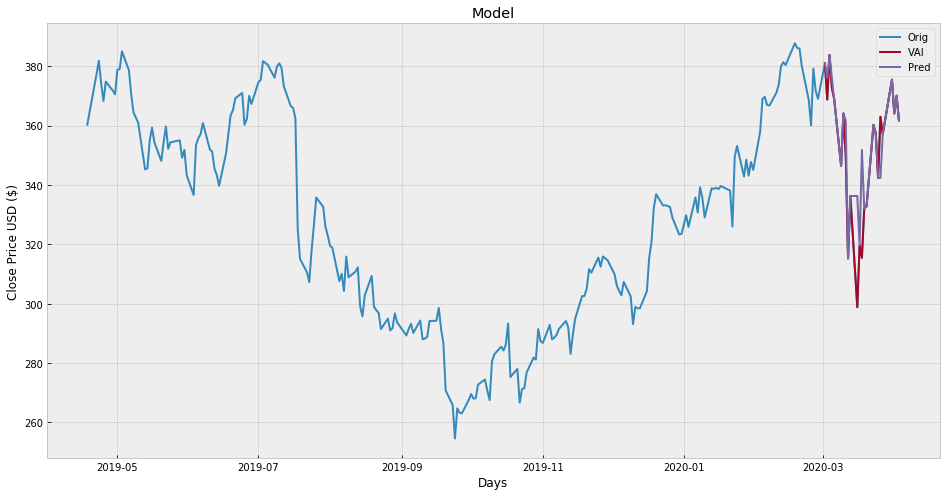

In [16]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','VAl','Pred'])
plt.show()